In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt

# Load the Sentiment140 dataset
# Assuming the dataset is in a CSV file with columns 'target' (sentiment label) and 'text' (tweet text)
data = pd.read_csv('imdb1.csv')



In [18]:
# Preprocess the data
reviews = data['review'].values
labels = data['sentiment'].values



In [19]:
# Tokenize the text data
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(reviews)
sequences = tokenizer.texts_to_sequences(reviews)
X = pad_sequences(sequences, maxlen=100)
# Convert sentiment labels to binary (0 for negative, 1 for positive)
y = (labels == 'positive').astype(int)

In [20]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# Build a simple LSTM model
model = Sequential()
model.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model.add(LSTM(units=64))
model.add(Dense(units=1, activation='sigmoid'))

In [22]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=64, epochs=5, validation_data=(X_val, y_val))

Epoch 1/5
625/625 [==============================] - 75s 115ms/step - loss: 0.3876 - accuracy: 0.8239 - val_loss: 0.3155 - val_accuracy: 0.8656
Epoch 2/5
625/625 [==============================] - 58s 93ms/step - loss: 0.2558 - accuracy: 0.8967 - val_loss: 0.3074 - val_accuracy: 0.8682
Epoch 3/5
625/625 [==============================] - 57s 92ms/step - loss: 0.1891 - accuracy: 0.9275 - val_loss: 0.3620 - val_accuracy: 0.8622
Epoch 4/5
625/625 [==============================] - 58s 93ms/step - loss: 0.1467 - accuracy: 0.9442 - val_loss: 0.3792 - val_accuracy: 0.8645
Epoch 5/5
625/625 [==============================] - 53s 85ms/step - loss: 0.1084 - accuracy: 0.9610 - val_loss: 0.4191 - val_accuracy: 0.8621


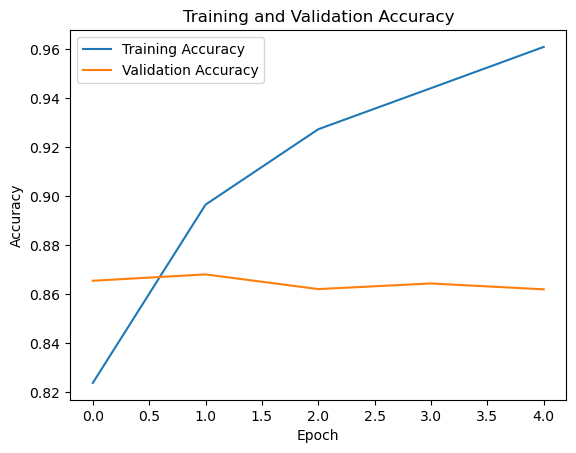

In [24]:
# Visualize training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [25]:
# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.4191 - accuracy: 0.8621
Validation Accuracy: 0.8621000051498413
